## Boosting

- **When need a model with better performance than decision trees or random forest?: BOOST**

  - can weak learner into strong learner?
  - Cofidence-rated predictions instead of majority vote (Schapire & Singer, 1998)
  - Weighted majority vote among weak learners

- Ensemble methods combining weak learner into strong one 
  - to train predictor sequentially and to correct its predecessor 
  
- methodology: AdaBoost (Adapative Boosting),   GradientBoost 

## What is boosting in statistical perspective? 

- It is derived from loss function and a way of finding a optimal solution

\begin{align*}
\underset{f}{min}\sum_{i=1}^{N}L(y_i, f(x_i))=\|Y-f(x)\| 
\end{align*}

|Name            |loss|derivative|$f^*$|algorithm|
|:-----          |:----------:|:-----:|:--------:|
|squared loss    |$\frac{1}{2}(y-f(x))^2$|$(y-f(x))$    | $E(y|x)$     | L2Boosting      |
|absolute loss   |$|(y-f(x)|$           |$sign(y-f(x))$|median$(y|x)$ |Gradient Boosting|
|exponential loss|$exp(-\tilde{y} f(x))$|$-\tilde{y}exp(-\tilde{y} f(x))$|$\frac{1}{2}\frac{\pi}{1-\pi}$|AdaBoost|
|log loss|$1+ e^{-\tilde{y} f(x)}$|$y-\pi$|$\frac{1}{2}\frac{\pi}{1-\pi}$|LogitBoost|

- where
  - $\tilde{y} \in \{-1, 1\}$
  - $pi = sigm(2f(x)), sigm(x) = \frac{e^x}{1+e^x}$

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from IPython.display import Image

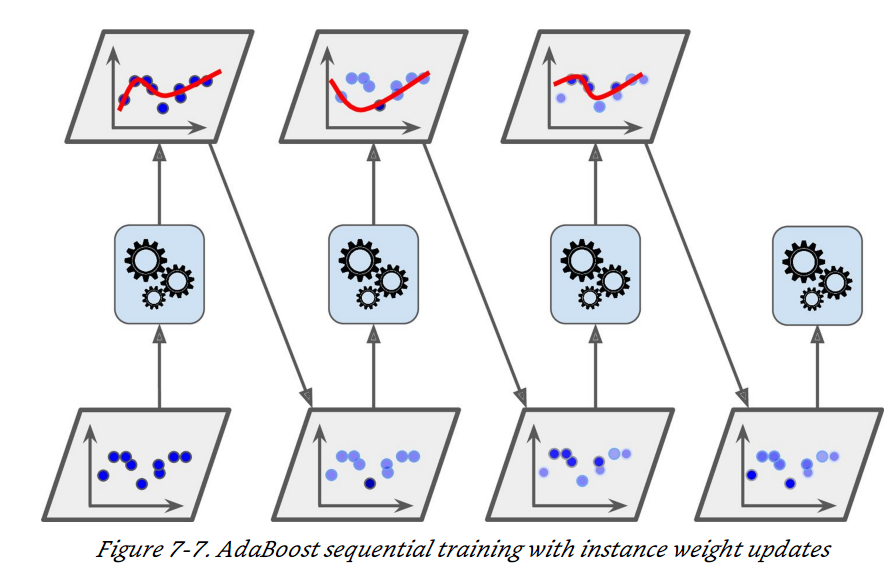

In [3]:
Image("c:/python/images/AdaBoostFig.PNG", height=200, width=600)  # from geron

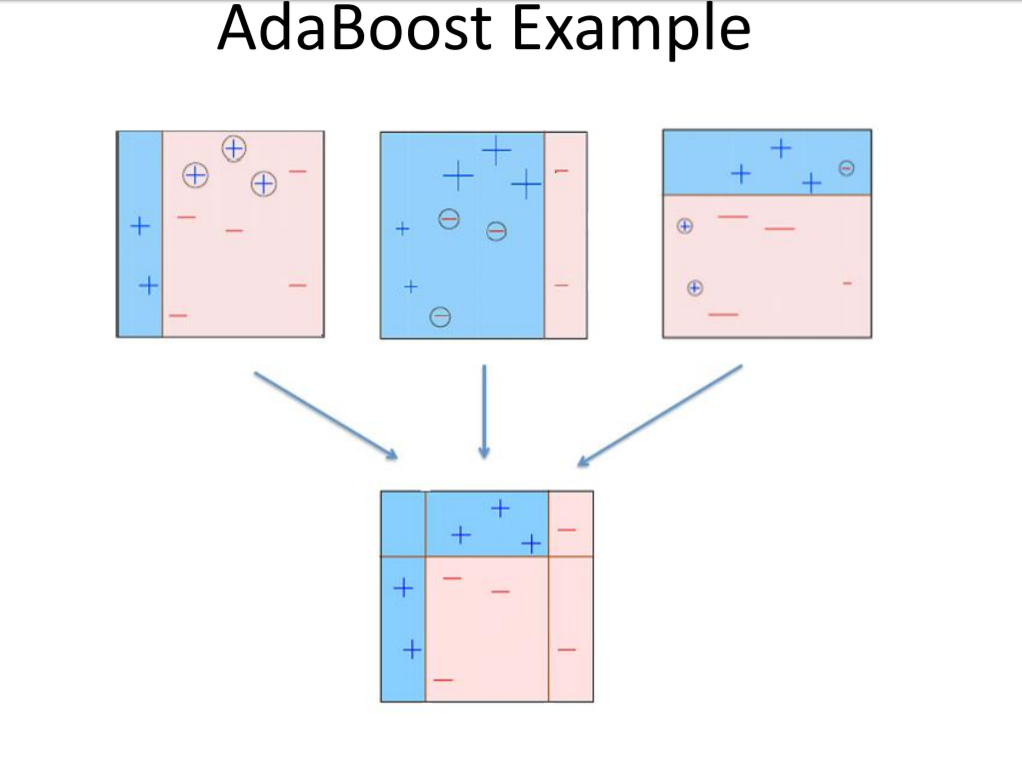

In [4]:
Image("c:/python/images/AdaBoost_Example.PNG", width=450, height=150)
#from googling

### AdaBoost Procedure

1. data: $X, y = \{[x_1, x_2, \cdots, x_m], y\}$  where $x_i \in R^d$
   - notation $i \in {1,2, \cdots, m}$
   - notation $j$ is index for $y_i's$   
2. initial weight $\omega_i = \frac{1}{m}$
3. weighted misclassfied error of $j^{th}$ predictor $r_j$ 
   - $r_j = \frac{\sum_{\overset{i=1}{\hat{y}\neq y}}^{m}\omega_i}{\sum_{i=1}^{m}\omega_i}$ where  $\hat{y}$=(predictor) 
   
4. calculate predictor weight $\alpha_j$    
  - $\alpha_j = \eta \log\frac{1-r_j}{r_j}$, where $\eta$ is learning rate(usually 1)
  

5. Misclassified samples are boosted as following and then normalized with $\sum{\omega_i}$:
  \begin{align*}
   \omega^i = 
 \begin{cases}
   \omega^i & \text{for}\;\;\; \hat{y}_j^i = y^i \\
   \omega^i \exp(\alpha_j) & \text{for}\;\;\; \hat{y}_j^i \neq y^i 
 \end{cases}
\end{align*}

6. $\hat{y}= \underset{k}{argmax} \sum_{j=1}^{m}\alpha_j \mathbb{1}_{\{\hat{y}=k\}}$


**simple example**

- $\omega={0.5, 0.2, 0.1, 0.2}$
- $\hat{y} = [1, 1, -1, 1]$
- $y = [-1, 1, -1, -1]$
- then $r_{-1}= \frac{0.5+0.2}{0.5+0.2+0.1+0.2}=0.7$

## Bagging vs. Boosting 

|      | Bagging   | Boosting |
|------|-----------|----------|
|objective|reduce variance|reduce bias|
|data for|(HV, LB)|(LV, HB)|
|algo|Random Forest|Ada or Gradient |
|sampling|random sampling|RS with weighted error|

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [11]:
data = load_iris()
X = data.data 
y = data.target

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

In [12]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, learning_rate=1)
abc.fit(Xtrain, ytrain)
yhat = abc.predict(Xtest)

# base_estimator: base model: default is DecisionTreeClassifier
# n_estimators: Number of model to iteratively train 
# learning_rate: the contribution of each model to the weights.default=1
# lose: set the loss function when updating weights     

**If your AdaBoost ensemble is overfitting the training set, 
you can try reducing the number of estimators or 
more strongly regularizing the base estimator.**

- reduce the number of estimators: `n_estimators`
- _regularizing_: use base model as `RandomForestClassfier` or change `DecisionTreeClassfier(min_samples_split)`

## Gradient Boosting

- Ensemble
- sequentially adding prediction erros to ensemble
  - to fit the new predictor to the residual errors made by the previous predictor

### pseudo algorithm of GB

- find way of $F_m(x) = F_{m-1}(x)+ \gamma h(m)$
    - $F(\cdot)$: a model fitted to data
    - $h(\cdot)$: a model fitted to residuals after fitting $F(\cdot)$ 
- procedure
  1. $F_0(x) = \underset{\gamma}{argmin}\sum_{i=1}^{n}L(y_i, \gamma)$
  2. for m in range(0, M):
     - compute residuals 
     - fit base learner(ex:DecisionTreeClassifier) to rediduals
     - $F_i$=DecisionTreeClassifier()
     - feature selection if necessary :RandomFeatureSelection()
     - $F_i.fit(x, residuals)$
     - compute gradient $\gamma_m$
    

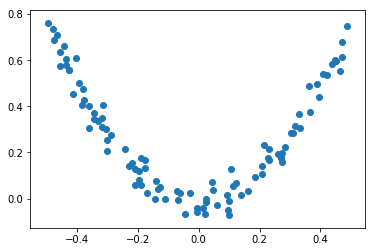

In [13]:
## generate noise quadratic data

np.random.seed(42)
X = np.random.rand(100, 1) -0.5
y = 3 * X[:, 0] **2 + 0.05 * np.random.randn(100)

plt.scatter(X,y)

In [14]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

reg1_tree = DecisionTreeRegressor(max_depth=2, random_state=133)
reg1_tree.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=133, splitter='best')

In [15]:
y2 = y - reg1_tree.predict(X)

reg2_tree = DecisionTreeRegressor(max_depth=2, random_state=133)
reg2_tree.fit(X, y2)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=133, splitter='best')

In [22]:
y3 = y2 - reg2_tree.predict(X)

reg3_tree = DecisionTreeRegressor(max_depth=2, random_state=133)
reg3_tree.fit(X, y3)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=133, splitter='best')

### Hence Gradient Boos is ensemble of weak prediction learners

In [23]:
X_new = np.array([[0.8]])
y_pred = sum(tree.predict(X_new) for tree in (reg1_tree, reg2_tree, reg3_tree))
y_pred 

array([0.75026781])

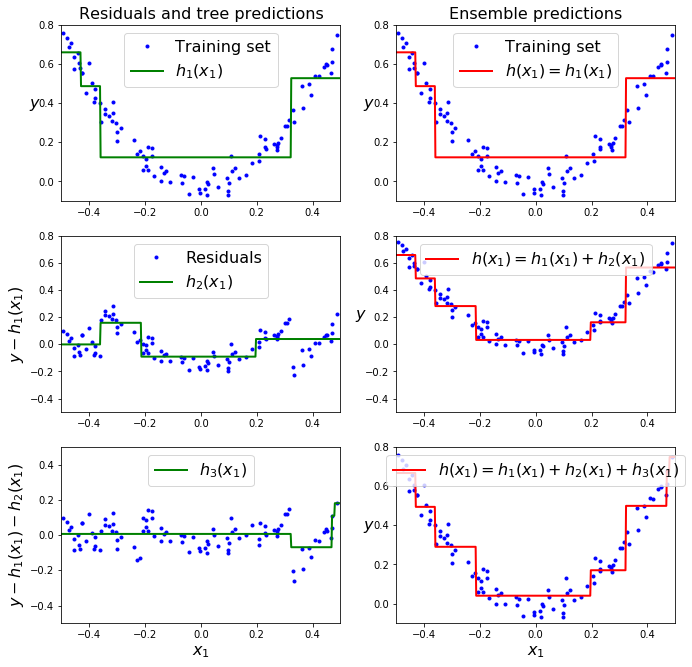

In [24]:
plt.figure(figsize=(11,11))

plt.subplot(321)
plot_predictions([reg1_tree], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Residuals and tree predictions", fontsize=16)

plt.subplot(322)
plot_predictions([reg1_tree], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Ensemble predictions", fontsize=16)

plt.subplot(323)
plot_predictions([reg2_tree], X, y2, axes=[-0.5, 0.5, -0.5, 0.8], label="$h_2(x_1)$", style="g-", data_style="b.", data_label="Residuals")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(324)
plot_predictions([reg1_tree, reg2_tree], X, y, axes=[-0.5, 0.5, -0.5, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(325)
plot_predictions([reg3_tree], X, y3, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_3(x_1)$", style="g-", data_style="b.")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(326)
plot_predictions([reg1_tree, reg2_tree, reg3_tree], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.show()

### what's for learning rate? :shrinkage 

- learning rate is a hyperparameter to gauge or scale the contribution of each tree
  - if lower, the contribution would be smaller and need more trees: shrinkage technique
- below left panel is showing not enought tree 

In [25]:
# data generation 

np.random.seed(42)
X = np.random.rand(100, 1) -0.5
y = 3 * X[:, 0] **2 + 0.05 * np.random.randn(100)

#plt.scatter(X,y)

In [28]:
# generate instances

from sklearn.ensemble import GradientBoostingRegressor

clf_gbr = GradientBoostingRegressor(max_depth=3, n_estimators=3, learning_rate=1.0, random_state=33)
clf_gbr.fit(X, y)

clf_gbr2 = GradientBoostingRegressor(max_depth = 3, n_estimators=200, learning_rate=0.3, random_state=33)
clf_gbr2.fit(X,y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.3, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, presort='auto', random_state=33,
             subsample=1.0, verbose=0, warm_start=False)

Text(0.5, 1.0, 'learning_rate=0.3, n_estimators=200')

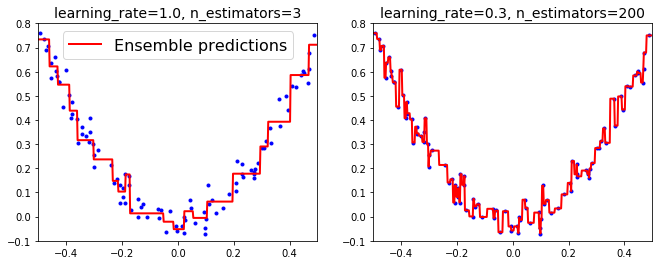

In [30]:
plt.figure(figsize=(11,4))

plt.subplot(121)
plot_predictions([clf_gbr], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(clf_gbr.learning_rate, clf_gbr.n_estimators), fontsize=14)

plt.subplot(122)
plot_predictions([clf_gbr2], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(clf_gbr2.learning_rate, clf_gbr2.n_estimators), fontsize=14)



### How to find optimal number of trees? 

- `.staged_predict(X)`: allowing monitoring (i.e. determine error on testing set) after each stage.

In [32]:
# generate data

np.random.seed(42)
X = np.random.rand(100, 1) -0.5
y = 3 * X[:, 0] **2 + 0.05 * np.random.randn(100)

#plt.scatter(X,y)

In [40]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [46]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y)

clf = GradientBoostingRegressor(n_estimators=120, max_depth=2, random_state=33)
clf.fit(Xtrain, ytrain)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=120, presort='auto', random_state=33,
             subsample=1.0, verbose=0, warm_start=False)

In [47]:
err = [mean_squared_error(ytest, yhat) for yhat in clf.staged_predict(Xtest)]
idx = np.argmin(err)

In [49]:
clf_best = GradientBoostingRegressor(n_estimators=idx, max_depth=2, random_state=33)
clf_best.fit(Xtrain, ytrain)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=73, presort='auto', random_state=33,
             subsample=1.0, verbose=0, warm_start=False)

In [50]:
min_err = np.min(err)

Text(0.5, 1.0, 'Best model (73 trees)')

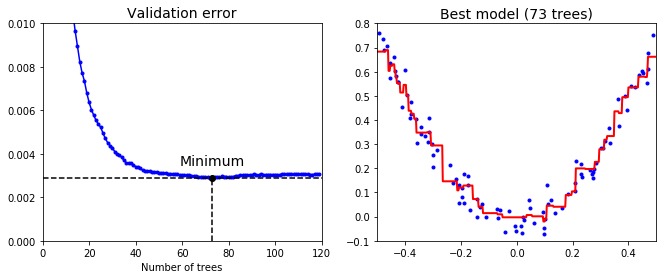

In [56]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(err, "b.-")
plt.plot([idx, idx], [0, min_err], "k--")
plt.plot([0, 120], [min_err, min_err], "k--")
plt.plot(idx, min_err, "ko")
plt.text(idx, min_err*1.2, "Minimum", ha="center", fontsize=14)
plt.axis([0, 120, 0, 0.01])
plt.xlabel("Number of trees")
plt.title("Validation error", fontsize=14)

plt.subplot(122)
plot_predictions([clf_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Best model (%d trees)" % idx, fontsize=14)

# save_fig("early_stopping_gbrt_plot")
# plt.show()

**---------------------------------------------------------------**

**FUNCTION**

In [51]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.2, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

In [19]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)
